In [1]:
ivar_fname = "/oak/stanford/orgs/kipac/users/delon/LensQuEst/act_dr5.01_s08s18_AA_f150_daynight_ivar.fits"

In [2]:
from pixell import enmap,utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
imap = enmap.read_map(ivar_fname)
#imap[0] should be for temperature

In [4]:
errmap = np.zeros_like(imap[0])
nonzero = np.where(imap[0] != 0)
errmap[nonzero] = 1/np.sqrt(imap[0][nonzero])

In [5]:
errmap_ratio = errmap / np.max(errmap)

In [6]:
from pixell import enplot
# plots = enplot.plot(imap[0],range=.0064288,mask=0)
# enplot.write("figures/ivar_plot",plots)


In [7]:
# plt.show()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 13

In [8]:
low = np.min(np.ma.masked_where(imap[0] == 0, imap[0]))

In [9]:
high = np.max(np.ma.masked_where(imap[0] == 0, imap[0]))

(2400, 2400)


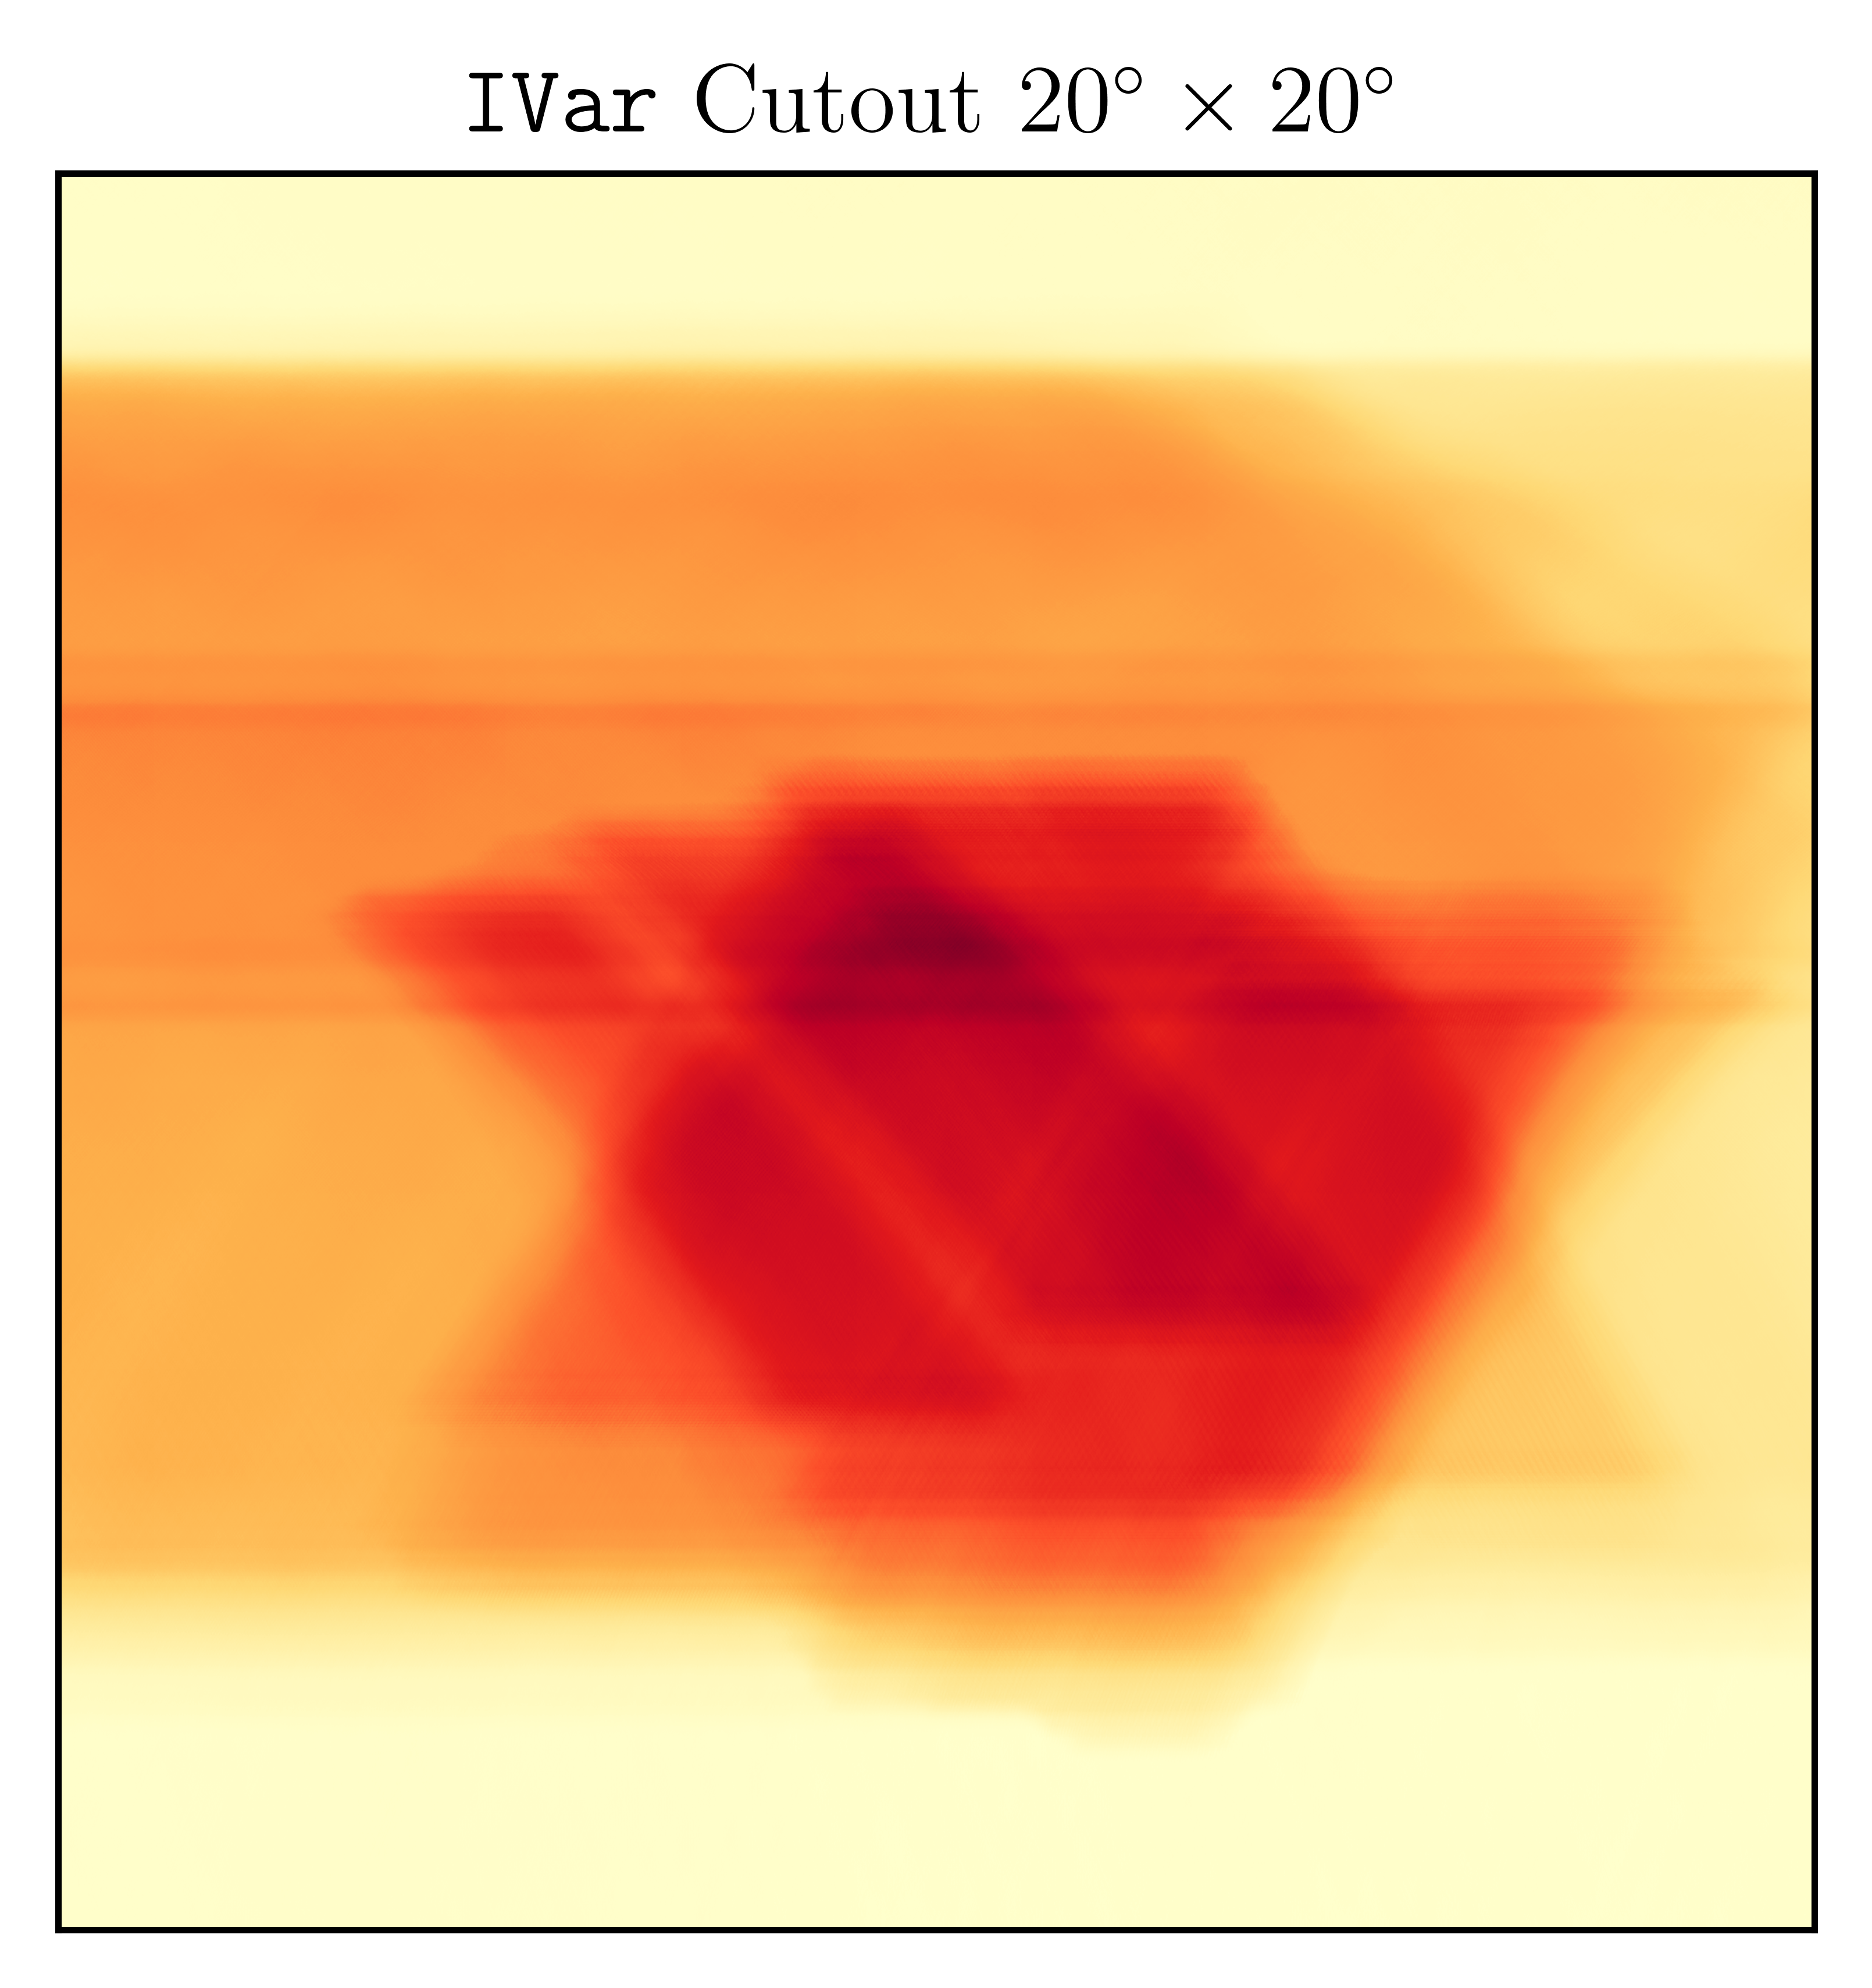

In [10]:
plt.figure(dpi=1000)

dec,ra = np.deg2rad([-38,-80])
dec,ra = np.deg2rad([-2.38,33.92])

width = np.deg2rad(20.) # 20 deg x 20 deg box

box = np.array([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
stamp = imap[0].submap(box)
plt.title(r'\texttt{IVar} Cutout $20^{\circ}\times 20 ^{\circ}$')
plt.imshow(np.ma.masked_where(stamp == 0, stamp), cmap='YlOrRd')

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
# plt.gca().set_axis_off()

print(stamp.shape)
plt.savefig('figures/ivar_map_cutout.pdf', bbox_inches='tight')

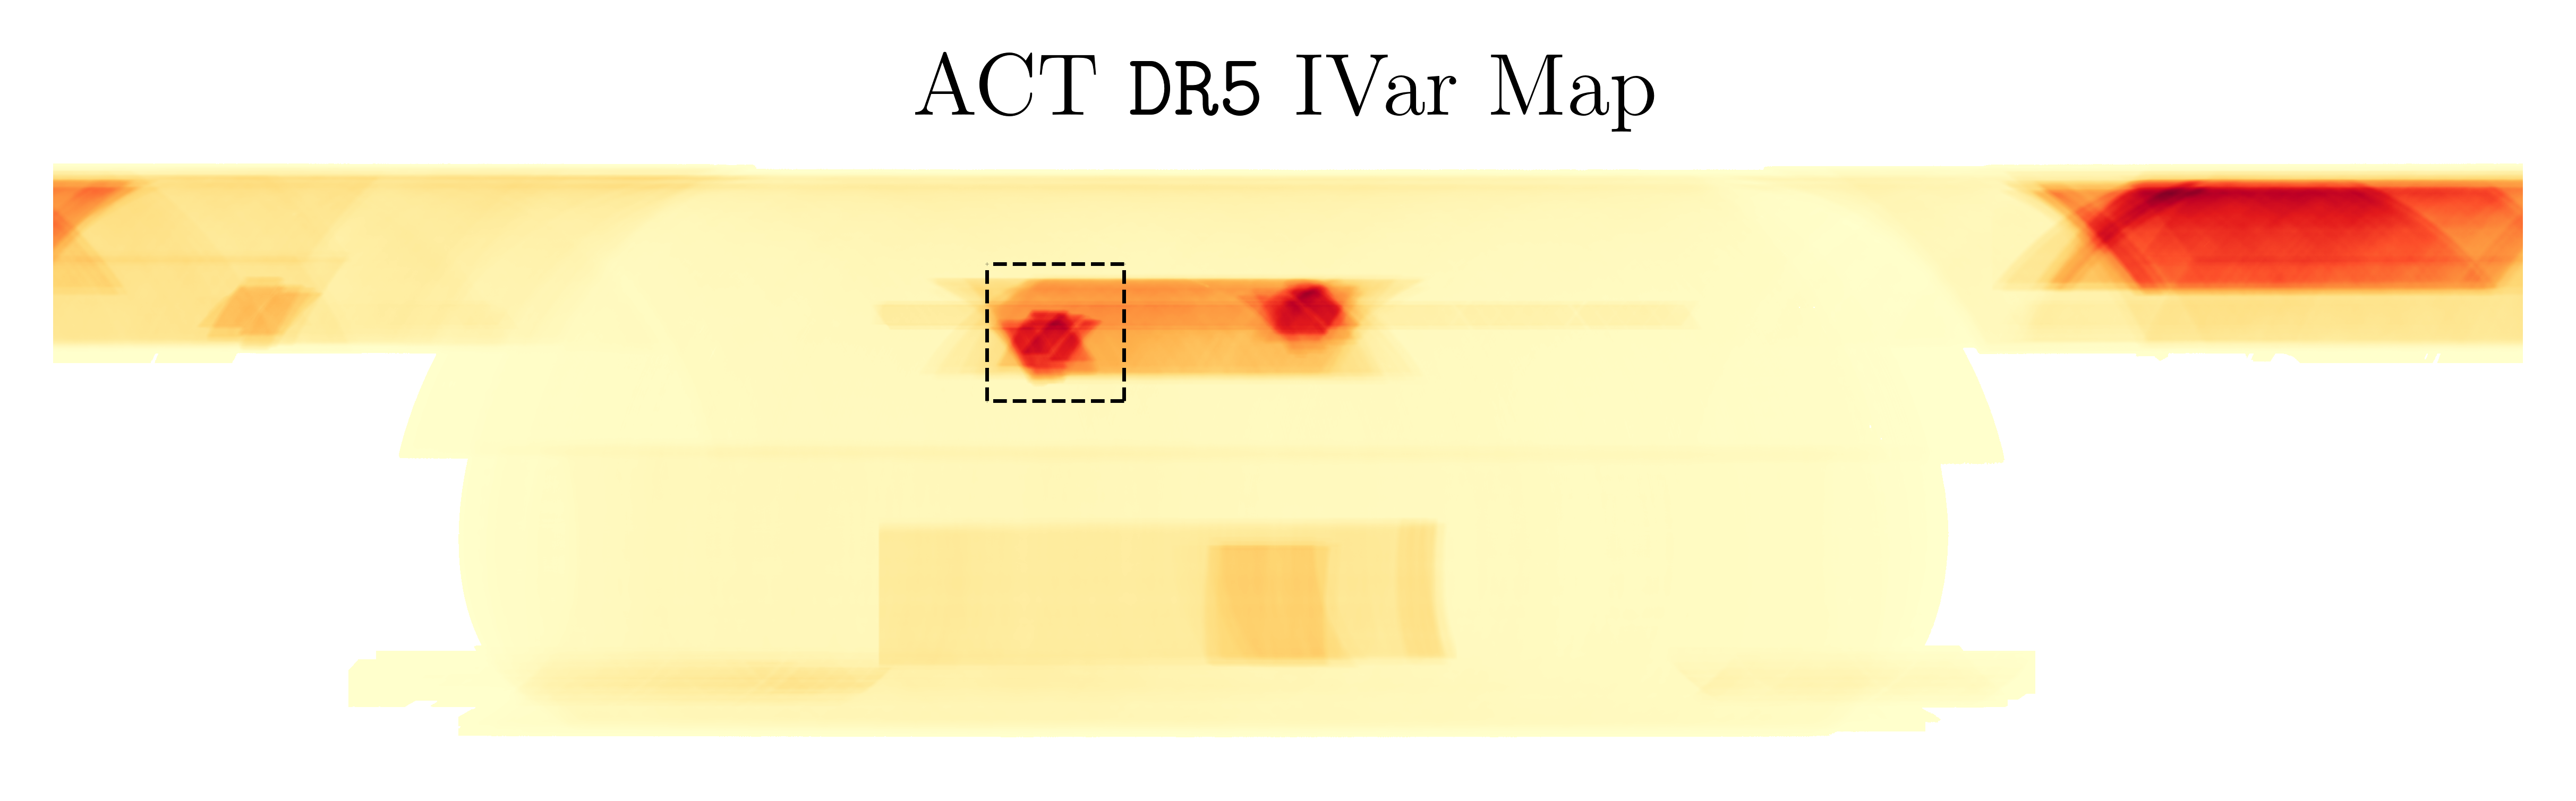

In [11]:
plt.figure(dpi=1000)





plt.imshow(np.ma.masked_where(imap[0] == 0, imap[0]), cmap='YlOrRd')


dec_range = [box[0,0], box[1,0]]
ra_range = [box[0,1], box[1,1]]
y, x = imap[0].sky2pix([dec_range, ra_range])
plt.plot([x[0], x[0]], [y[0], y[1]], 'k--', linewidth=0.5)
plt.plot([x[1], x[1]], [y[0], y[1]], 'k--', linewidth=0.5)
plt.plot([x[0], x[1]], [y[0], y[0]], 'k--', linewidth=0.5)
plt.plot([x[0], x[1]], [y[1], y[1]], 'k--', linewidth=0.5)

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().set_axis_off()

plt.title(r'ACT \texttt{DR5} IVar Map')
plt.savefig('figures/ivar_map.pdf', bbox_inches='tight')
plt.savefig('figures/ivar_map.png', bbox_inches='tight')

(1200, 1200)


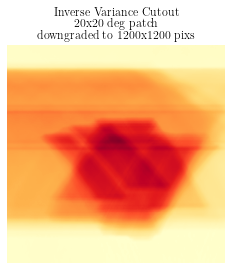

In [14]:
dec,ra = np.deg2rad([-2.38,33.92])
# dec,ra = np.deg2rad([-38,-80])

width = np.deg2rad(20.) # 20 deg x 20 deg box

box = np.array([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
stamp = imap[0].submap(box)
stamp = enmap.downgrade(stamp,2)

plt.title('Inverse Variance Cutout\n20x20 deg patch\ndowngraded to 1200x1200 pixs')
plt.imshow(np.ma.masked_where(stamp == 0, stamp), cmap='YlOrRd')

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().set_axis_off()
print(stamp.shape)

0.19724336 1.0
(1200, 1200)


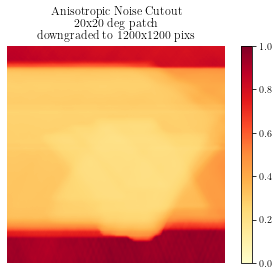

In [15]:
dec,ra = np.deg2rad([-2.38,33.92])
# dec,ra = np.deg2rad([-38,-80])

width = np.deg2rad(20.) # 20 deg x 20 deg box

box = np.array([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
stamp = imap[0].submap(box)
stamp = enmap.downgrade(stamp,2)
errmap = np.zeros_like(stamp)
errmap = 1/np.sqrt(stamp)
errmap = errmap / np.max(errmap)
errmap = np.array(errmap)
print(np.min(errmap), np.max(errmap))

plt.title('Anisotropic Noise Cutout\n20x20 deg patch\ndowngraded to 1200x1200 pixs')

plt.imshow(np.ma.masked_where(errmap == 0, errmap), cmap='YlOrRd', vmin=0, vmax=1)

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().set_axis_off()

plt.colorbar()
print(errmap.shape)

In [16]:
errmap

array([[0.94503987, 0.9453271 , 0.9443035 , ..., 0.95878726, 0.95221317,
        0.9625251 ],
       [0.94390804, 0.9418594 , 0.9345538 , ..., 0.9725007 , 0.95132   ,
        0.95404357],
       [0.9487302 , 0.94248503, 0.9356887 , ..., 0.959357  , 0.95318884,
        0.95863765],
       ...,
       [0.86886674, 0.873131  , 0.8668036 , ..., 0.7905182 , 0.7942976 ,
        0.79517585],
       [0.86938554, 0.86425847, 0.87578046, ..., 0.7954063 , 0.7971463 ,
        0.7899566 ],
       [0.8671727 , 0.86627   , 0.866327  , ..., 0.8053277 , 0.79668355,
        0.799886  ]], dtype=float32)

In [24]:
import pickle
with open('anisotropic_noise_map_worst_case.pkl', 'wb') as f:
    pickle.dump(errmap, f)

0.33038127 1.0
(1200, 1200)


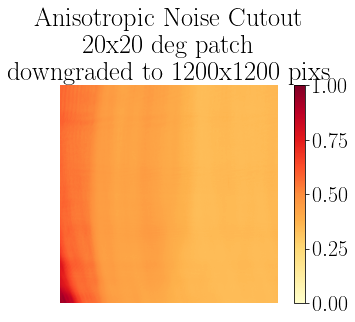

In [25]:
dec,ra = np.deg2rad([-2.38,33.92])
dec,ra = np.deg2rad([-38,-80])

width = np.deg2rad(20.) # 20 deg x 20 deg box

box = np.array([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
stamp = imap[0].submap(box)
stamp = enmap.downgrade(stamp,2)
errmap = np.zeros_like(stamp)
errmap = 1/np.sqrt(stamp)
errmap = errmap / np.max(errmap)
errmap = np.array(errmap)
print(np.min(errmap), np.max(errmap))

plt.title('Anisotropic Noise Cutout\n20x20 deg patch\ndowngraded to 1200x1200 pixs')

plt.imshow(np.ma.masked_where(errmap == 0, errmap), cmap='YlOrRd', vmin=0, vmax=1)

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().set_axis_off()

plt.colorbar()
print(errmap.shape)

In [26]:
import pickle
with open('anisotropic_noise_map.pkl', 'wb') as f:
    pickle.dump(errmap, f)